In [1]:
from qiskit                        import ( QuantumCircuit, 
                                            QuantumRegister, 
                                            ClassicalRegister, 
                                            transpile          )
from qiskit.visualization          import   plot_histogram
from qiskit.quantum_info.operators import   Operator

from qiskit_aer                    import   AerSimulator

from math                          import   sqrt 

In [6]:
# SMALL ERROR
# |0> -> a|0> + b|1> con a vicino a 1
# |1> -> c|1> - d|0> con c vicino a 1
small_error = Operator([ 
                     [ 1/sqrt(10/9), 1/sqrt(10/1)], 
                     [-1/sqrt(10/1), 1/sqrt(10/9)]
                                                   ]).to_instruction()
small_error.label = "S"

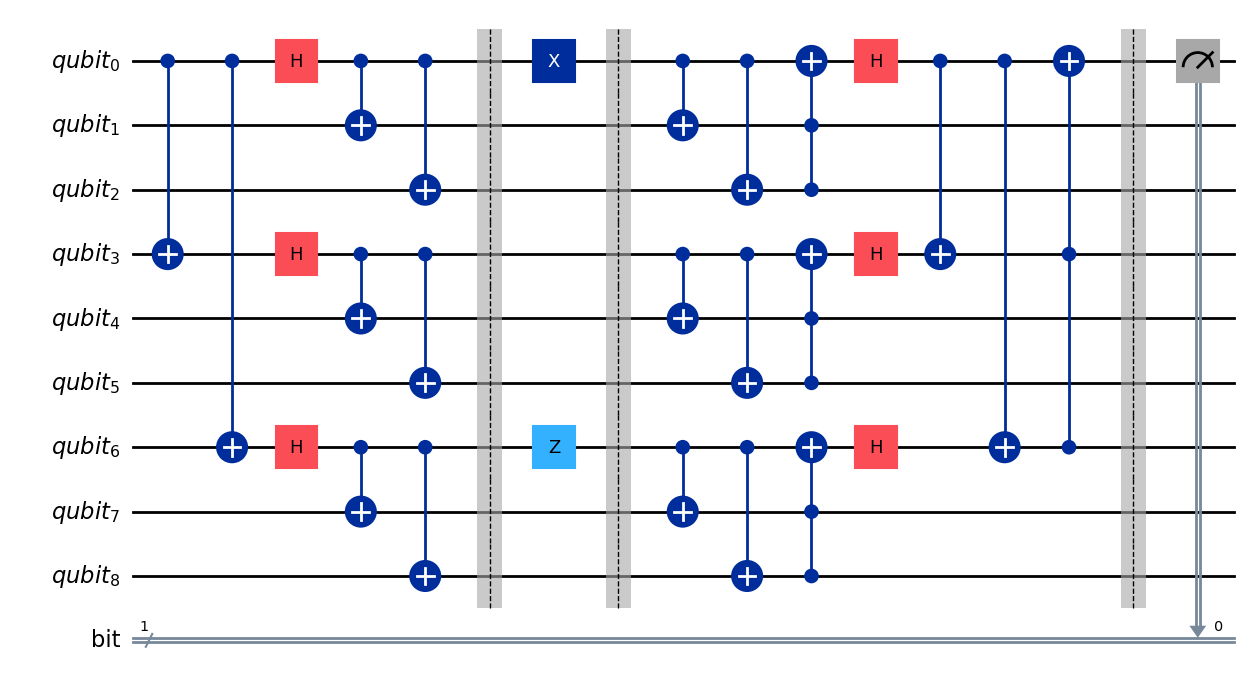

In [5]:
qubit = QuantumRegister(9,'qubit')
bit = ClassicalRegister(1,'bit')

circuit = QuantumCircuit(qubit, bit)

  
# CNOT
circuit.cx(qubit[0], qubit[3]);  circuit.cx(qubit[0], qubit[6])

# HADAMARD
circuit.h(qubit[0]);  circuit.h(qubit[3]);  circuit.h(qubit[6])

# CNOT
circuit.cx(qubit[0], qubit[1]);  circuit.cx(qubit[3], qubit[4]);  circuit.cx(qubit[6], qubit[7])
circuit.cx(qubit[0], qubit[2]);  circuit.cx(qubit[3], qubit[5]);  circuit.cx(qubit[6], qubit[8])

circuit.barrier() ##################################################################################

# BIT FLIP
circuit.x(qubit[0])

# PHASE FLIP
#circuit.z(qubit[0])
circuit.z(qubit[6])

# SMALL ERROR
#circuit.append(small_error, [0])

circuit.barrier() ##################################################################################

# CNOT
circuit.cx(qubit[0], qubit[1]);  circuit.cx(qubit[3], qubit[4]);  circuit.cx(qubit[6], qubit[7])
circuit.cx(qubit[0], qubit[2]);  circuit.cx(qubit[3], qubit[5]);  circuit.cx(qubit[6], qubit[8])

# TOFFOLI
circuit.ccx(qubit[2], qubit[1], qubit[0]);  circuit.ccx(qubit[5], qubit[4], qubit[3]);  circuit.ccx(qubit[8], qubit[7], qubit[6])

# HADAMARD
circuit.h(qubit[0]);  circuit.h(qubit[3]);  circuit.h(qubit[6])

# CNOT
circuit.cx(qubit[0], qubit[3]);  circuit.cx(qubit[0], qubit[6])

# TOFFOLI
circuit.ccx(qubit[6], qubit[3], qubit[0]); 

circuit.barrier() ##################################################################################

circuit.measure(qubit[0], bit[0])

# Draw the circuit
circuit.draw("mpl", filename='_res/shor_protocol.png')

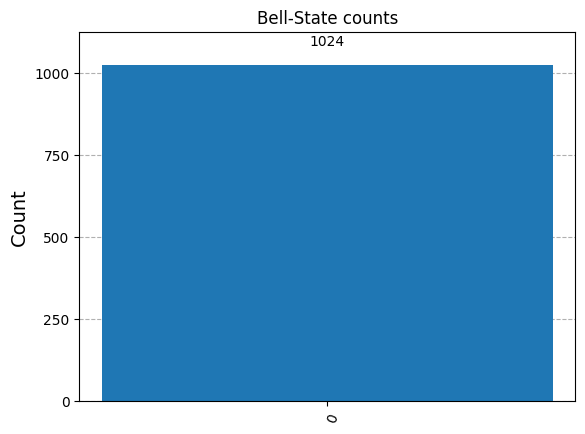

In [4]:
# Transpile for simulator
simulator = AerSimulator()
circuit = transpile(circuit, simulator)

# Run and get counts
result = simulator.run(circuit, shots="1024").result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='Bell-State counts')